# Loading and Preprocessing Data with TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

## The Data API

In [2]:
X = tf.range(10)

In [3]:
X

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [4]:
dataset = tf.data.Dataset.from_tensor_slices(X)

In [5]:
dataset

<TensorSliceDataset shapes: (), types: tf.int32>


Equivalently:

In [6]:
dataset = tf.data.Dataset.range(10)

In [7]:
dataset

<RangeDataset shapes: (), types: tf.int64>

In [8]:
def printDS(dataset):
    for item in dataset:
        print(item)

In [9]:
printDS(dataset)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [10]:
dataset = dataset.repeat(3).batch(7)

In [11]:
printDS(dataset)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [12]:
dataset = dataset.map(lambda x: x * 2)

In [13]:
printDS(dataset)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


In [14]:
dataset = dataset.unbatch()

In [15]:
printDS(dataset)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

In [16]:
dataset = dataset.filter(lambda x:x< 10)

In [17]:
printDS(dataset)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [18]:
def printDS(dataset, take = None):
    for item in (dataset.take(take) if take else dataset):
        print(item)

In [19]:
printDS(dataset, 3)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


## Shuffling the Data

In [20]:
dataset = tf.data.Dataset.range(10).repeat(3)

In [21]:
dataset = dataset.shuffle(buffer_size=5, seed = 259).batch(7)

In [22]:
printDS(dataset)

tf.Tensor([4 0 1 5 3 9 2], shape=(7,), dtype=int64)
tf.Tensor([7 0 6 1 3 4 7], shape=(7,), dtype=int64)
tf.Tensor([8 2 5 9 2 0 4], shape=(7,), dtype=int64)
tf.Tensor([5 6 7 6 1 8 8], shape=(7,), dtype=int64)
tf.Tensor([9 3], shape=(2,), dtype=int64)


If you call repeat() on a shuffled dataset, by default it will generate a new order at every iteration. This is generally a good idea, but if you prefer to reuse the same order at each iteration (e.g., for tests or debugging), you can set reshuffle_each_iteration=False.

### INTERLEAVING LINES FROM MULTIPLE FILES

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=259)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=259)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_


For a very large dataset that does not fit in memory, you will typically want to split it into many files first, then have TensorFlow read these files in parallel. To demonstrate this, let's start by splitting the housing dataset and save it to 20 CSV files:

In [25]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    import os
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [26]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

In [27]:
train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [28]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,2.7857,20.0,5.110187,1.020790,1227.0,2.550936,37.79,-120.98,1.109
1,7.8774,15.0,6.077160,1.024691,822.0,2.537037,37.21,-122.09,3.949
2,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69,1.830
3,5.0543,21.0,6.760925,1.146530,1789.0,4.598972,37.31,-121.80,2.320
4,5.5073,16.0,5.172535,1.036972,1718.0,3.024648,37.41,-121.86,1.789


In [29]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

### Building an Input Pipeline

In [30]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=259)

In [31]:
printDS(filepath_dataset)

tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_11.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_04.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [32]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath : tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

In [33]:
for line in dataset.take(5):
    print(line.numpy())

b'3.6094,47.0,5.820338983050847,1.064406779661017,868.0,2.942372881355932,34.19,-118.15,1.607'
b'5.4605,31.0,5.436813186813187,0.9986263736263736,1924.0,2.642857142857143,32.83,-117.22,1.902'
b'2.8924,52.0,5.355353075170843,1.0455580865603644,1169.0,2.662870159453303,36.67,-121.65,1.696'
b'6.9261,24.0,7.150753768844221,1.035175879396985,1954.0,3.273031825795645,33.69,-117.95,2.846'
b'5.253,5.0,7.093508500772797,1.0517774343122102,4573.0,3.534003091190108,33.96,-117.23,1.633'


For interleaving to work best, it is preferable to have files of identical length; otherwise the ends of the longest files will not be interleaved.

In [34]:
n_inputs = 8

def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [35]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.17586298,  1.2235422 , -0.04568288, -0.38526082, -0.50061417,
        -0.06234207,  0.86403656, -1.3197198 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

### Putting Everything Together

In [36]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

By calling prefetch(1) at the end, we are creating a dataset that will do its best to always be one batch ahead.2 In other words, while our training algorithm is working on one batch, the dataset will already be working in parallel on getting the next batch ready (e.g., reading the data from disk and preprocessing it). This can improve performance dramatically

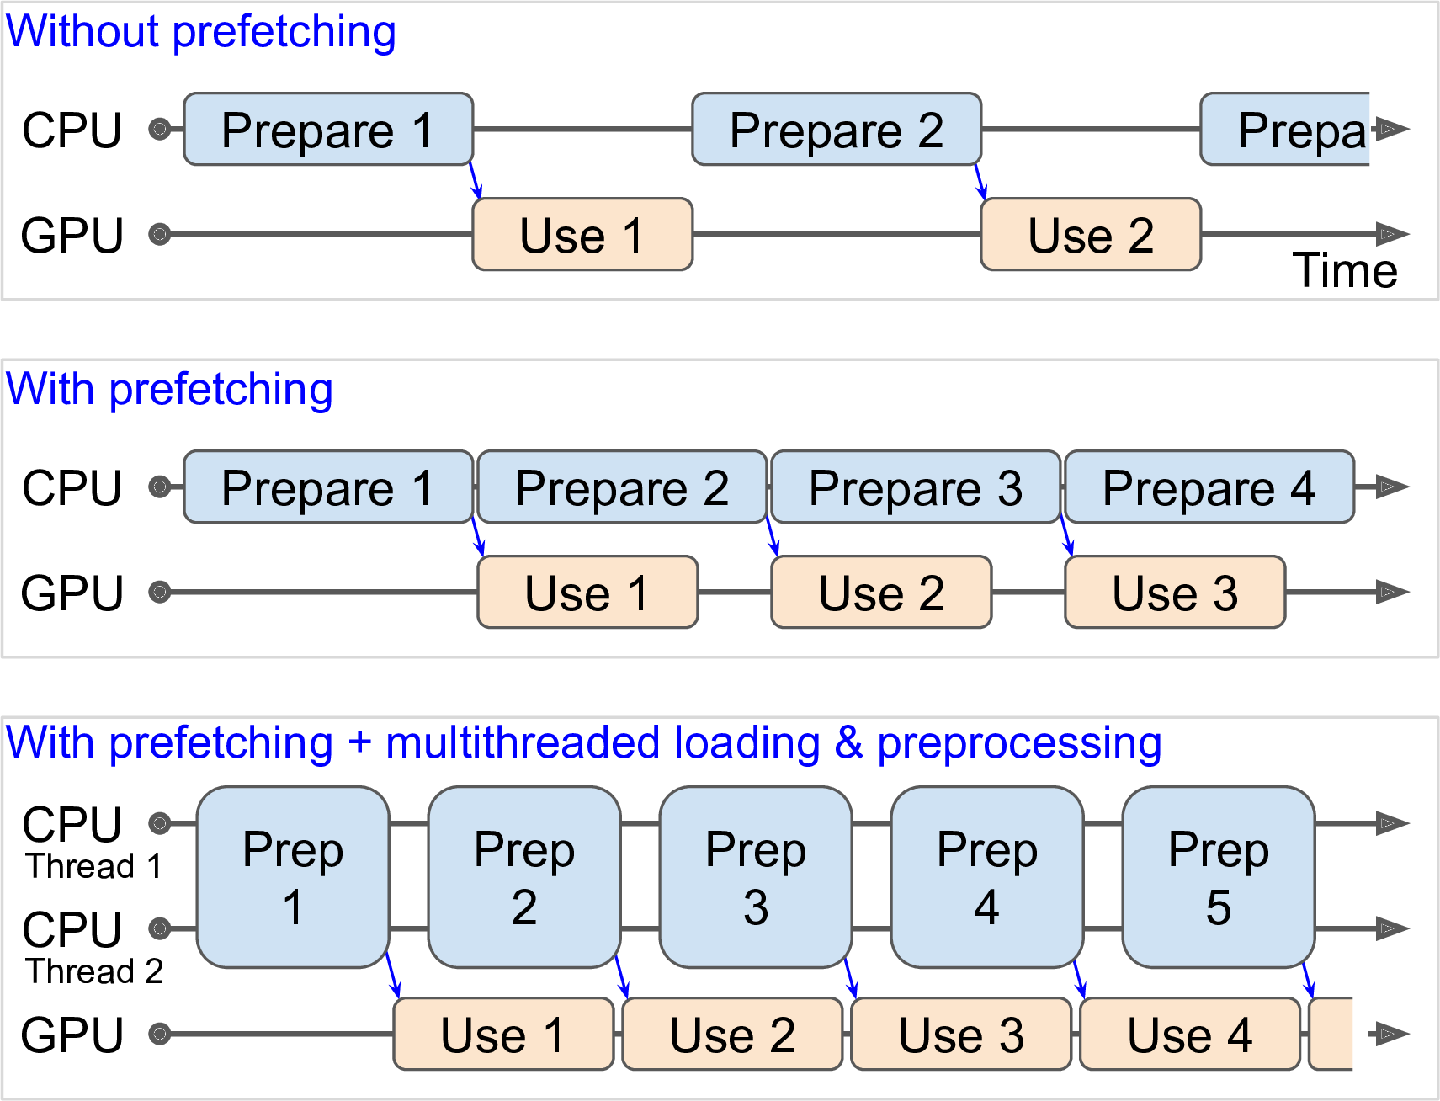

In [37]:
tf.random.set_seed(259)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print('X = ', X_batch)
    print('y = ', y_batch)
    print()

X =  tf.Tensor(
[[-0.39117596 -0.44904044 -0.6613245  -0.05243741  0.8375695  -0.095413
  -0.6911488   0.59665453]
 [-0.62270355  1.303189   -0.31351185  0.14793408 -0.23904042  0.02037749
  -0.569358    0.38149974]
 [ 1.6428047  -0.9269212   0.49610582 -0.29279825  0.64268833  0.01559967
  -0.9159965   0.7967991 ]], shape=(3, 8), dtype=float32)
y =  tf.Tensor(
[[2.631]
 [1.204]
 [3.307]], shape=(3, 1), dtype=float32)

X =  tf.Tensor(
[[-1.2773662   1.1438954  -0.30473638  0.11235887  0.43394902  0.10785495
   0.52676684 -0.1088505 ]
 [-0.3926055   1.7014229   0.1683773  -0.12993701 -0.46077183 -0.01944213
  -0.78483504  0.63167953]
 [ 0.14028397  1.1438954  -0.0677861  -0.00219212 -0.3542368  -0.09053566
  -0.73330754  0.5766397 ]], shape=(3, 8), dtype=float32)
y =  tf.Tensor(
[[0.466  ]
 [1.2    ]
 [5.00001]], shape=(3, 1), dtype=float32)



In [38]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [39]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [40]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [41]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 6ms/step - loss: 2.3222 - val_loss: 1.1523
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 1.0267 - val_loss: 0.7748
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6872 - val_loss: 0.7106
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6385 - val_loss: 0.6744
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6118 - val_loss: 0.6505
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5972 - val_loss: 0.6296
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5613 - val_loss: 0.6129
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5625 - val_loss: 0.5967
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5327 - val_loss: 0.5867
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5344 - val_loss: 0.5729

In [42]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.5275


0.5275448560714722

In [43]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

array([[0.5930161 ],
       [2.2513094 ],
       [3.767787  ],
       ...,
       [1.770155  ],
       [0.7399308 ],
       [0.92326367]], dtype=float32)

In [44]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● cache()              Caches the elements in this dataset.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`.
● from_tensor_slices() Creates a `Dataset` whose elements are slices of the given tensors.
● from_tensors()       Creates a `Dataset` with a single element, comprising the given tensors.
● interleave()      

## The TFRecord Format

TFRecords are useful when the bottleneck during training is loading and parsing the data.

In [45]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [46]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)
printDS(dataset)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [49]:
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("File {} record {}".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


In [50]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [53]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)
